<a href="https://colab.research.google.com/github/avigyan24/Deep_Learning_topics/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df=pd.read_csv('customer_churn.csv')

In [48]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
df.drop('customerID',axis='columns',inplace=True)

In [51]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [52]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [53]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [54]:
df.shape

(7043, 20)

In [55]:
df.iloc[6754].TotalCharges

' '

In [56]:
df[df.TotalCharges !=' '].shape

(7032, 20)

In [57]:
df1=df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [58]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [59]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-59-01816c9a1a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [60]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

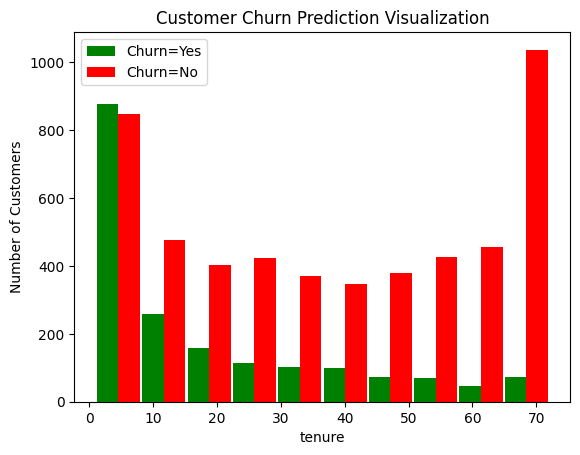

In [61]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

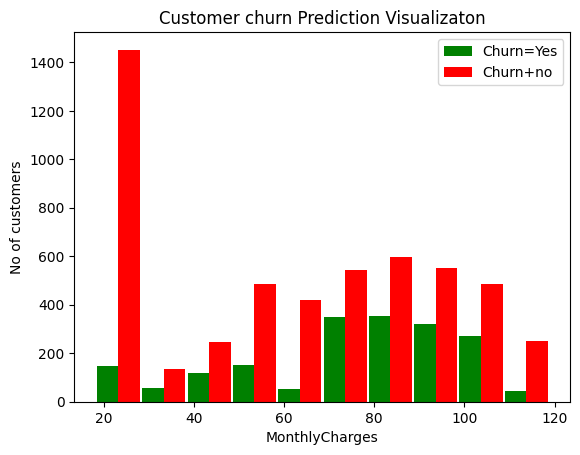

In [62]:
monthly_charges_no=df1[df1.Churn=='No'].MonthlyCharges
monthly_charges_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("No of customers")
plt.title("Customer churn Prediction Visualizaton")

plt.hist([monthly_charges_yes,monthly_charges_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn+no'])
plt.legend()

In [63]:
def print_unique_values(df):
  for col in df:
    if df[col].dtype == 'object':
      print(f'{col}: {df[col].unique()}')

In [64]:
print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [65]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

<ipython-input-65-d585b526d196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
<ipython-input-65-d585b526d196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [66]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-66-d0fe7cd28676>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [67]:
for col in yes_no_col:
  print(f'{col}: {df1[col].unique()}')

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]


In [68]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

<ipython-input-68-56cf5fd99bb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Male':1,'Female':0},inplace=True)


In [90]:

#one-hot encoding

df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.shape

(7032, 27)

In [70]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1189,1,0,0,0,3,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1131,0,0,1,0,14,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
3492,0,0,0,0,3,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1319,1,0,0,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1084,0,0,1,1,52,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [71]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler

sx=MinMaxScaler()

df2[col_to_scale]=sx.fit_transform(df2[col_to_scale])

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df2.drop('Churn',axis='columns'),df2['Churn'],test_size=0.2,random_state=5)

In [75]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy','Precision'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 5ms/step - loss: 0.4783 - Accuracy: 0.7780 - precision: 0.6191
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4268 - Accuracy: 0.7972 - precision: 0.6449
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4171 - Accuracy: 0.8043 - precision: 0.6582
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4130 - Accuracy: 0.8046 - precision: 0.6591
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4108 - Accuracy: 0.8073 - precision: 0.6661
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4091 - Accuracy: 0.8068 - precision: 0.6640
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4075 - Accuracy: 0.8064 - precision: 0.6691
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4065 - Accuracy: 0.8096 - precision: 0.6717
Epoch 9/100
176/176 [===========

In [76]:
model.evaluate(X_test,y_test)
Y_predicted=model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [80]:
Y_predicted[:10]

array([[0.385731  ],
       [0.40495127],
       [0.00984765],
       [0.72011155],
       [0.4746811 ],
       [0.95143455],
       [0.00578679],
       [0.30618158],
       [0.14718612],
       [0.1464991 ]], dtype=float32)

In [81]:
y_p=[]
for val in Y_predicted:
  if val>0.5:
    y_p.append(1)
  else:
    y_p.append(0)


In [82]:
y_p[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [83]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       999
           1       0.64      0.45      0.53       408

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Predicted')

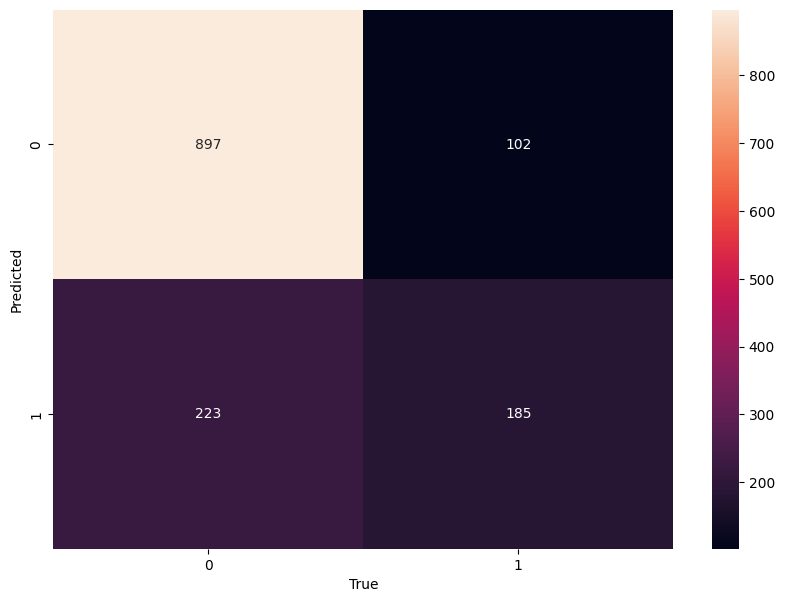

In [88]:
import seaborn as sns

cfm=tf.math.confusion_matrix(labels=y_test,predictions=y_p)

plt.figure(figsize=(10,7))
sns.heatmap(cfm,annot=True,fmt='d')
plt.xlabel('True')
plt.ylabel('Predicted')